In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time, sys
from IPython.display import clear_output, display
from time import sleep
import random

In [2]:
%run -i ./Classes.ipynb

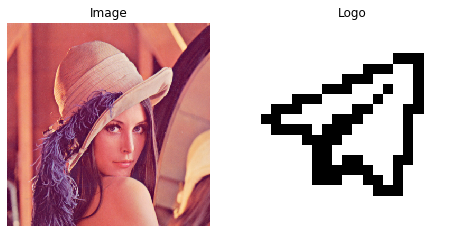

In [30]:
# Load
ori_img = cv2.imread('./assets/lena.png') #BGR
ori_logo = cv2.imread('./assets/paperplane.png', 0)

image_size = 384
logo_size = 20

# Initialize
my_image = Image(ori_img, image_size)
my_logo = Logo(ori_logo, logo_size)

ImageUtil.show([[my_image.image, my_logo.logo]], [['Image', 'Logo']])

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

PSNR = 31.903398677904683


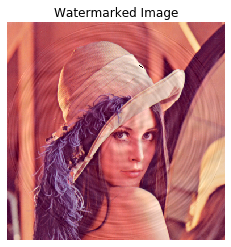

In [31]:
# Watermarker
riw = RIW(image_size, logo_size, 36, 0.5, 16)

# Embed
img_y_watermarked = riw.embed(my_image.get_y(), my_logo.logo)

w_image = Image.copy(my_image)
w_image.set_y(img_y_watermarked)

print('PSNR = {}'.format(ImageUtil.psnr(my_image.image, w_image.image)))

ImageUtil.show1(w_image.image, 'Watermarked Image')

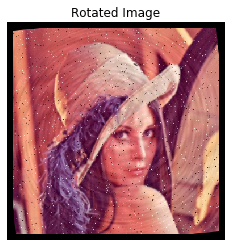

In [32]:
# Attack

attacked_image = np.copy(w_image.image)
attacked_image = Attacker.attackFilterGauss(attacked_image, 3)
attacked_image = Attacker.attackNoiseSaltPepper(attacked_image, 0.01)
attacked_image = Attacker.attackJPG(attacked_image, 90)
attacked_image = Attacker.attackRotate(attacked_image, 5)
attacked_image = Attacker.attackCrop(attacked_image, 0.03, 0.03, 0.03, 0.03)

a_image = Image(attacked_image, w_image.image_size)

ImageUtil.show1(a_image.image, 'Rotated Image')

'Transform PCET: [####################] 100.0%'

BER = 5.75%


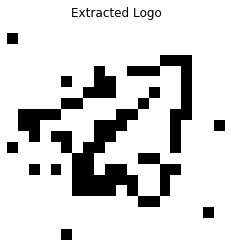

In [33]:
logo_extracted = riw.extract(a_image.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_extracted)))

ImageUtil.show1(logo_extracted, 'Extracted Logo')